<a href="https://colab.research.google.com/github/LyanhVini/Analysis-of-Anthropic-Indicators-in-Amazonian-Communities-/blob/main/Decision%20Trees/random_forest_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install graphviz pydotplus

In [ ]:
eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Árvores/Comunidadesv4.xlsx").filter(["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09", "P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "perfil"])
eixo_1 = eixo_1.loc[0:103].reset_index(drop=True)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,5,5,5,3,5,3,3,3,2,4,...,2,2,2,2,5,5,3,3,3,Quilombola
1,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,Quilombola
2,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,Quilombola
3,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,Quilombola
4,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,Indígena
100,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,Indígena
101,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,Indígena
102,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,Indígena


In [ ]:
eixo_1.replace('X', pd.NA, inplace=True)
eixo_1.replace('x', pd.NA, inplace=True)
eixo_1.dropna(inplace=True)
eixo_1 = eixo_1.reset_index()
eixo_1 = eixo_1.drop('index', axis=1)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,Quilombola
1,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,Quilombola
2,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,Quilombola
3,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,Quilombola
4,4,4,3,3,4,5,4,5,3,3,...,3,2,2,2,3,4,3,2,3,Quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,Indígena
90,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,Indígena
91,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,Indígena
92,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,Indígena


In [ ]:
eixo_1.perfil.unique()

array(['Quilombola', 'Indígena', 'Pescador', 'Urbano'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import plot_tree

In [ ]:
X = eixo_1.drop("perfil", axis=1)
y = eixo_1["perfil"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

In [ ]:
arveres = RandomForestClassifier(n_estimators=300, min_samples_leaf=2, random_state=0, n_jobs=-1)
arveres.fit(Xtr, ytr)

p = arveres.predict(Xval)

np.sqrt(mean_squared_error(yval, p))

0.9225312080288851

In [ ]:
accuracy = accuracy_score(yval, p)
report = classification_report(yval, p)

In [ ]:
accuracy

0.7446808510638298

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.67      0.29      0.40         7\n           1       0.81      1.00      0.90        13\n           2       0.67      0.93      0.78        15\n           3       0.86      0.50      0.63        12\n\n    accuracy                           0.74        47\n   macro avg       0.75      0.68      0.68        47\nweighted avg       0.76      0.74      0.72        47\n'

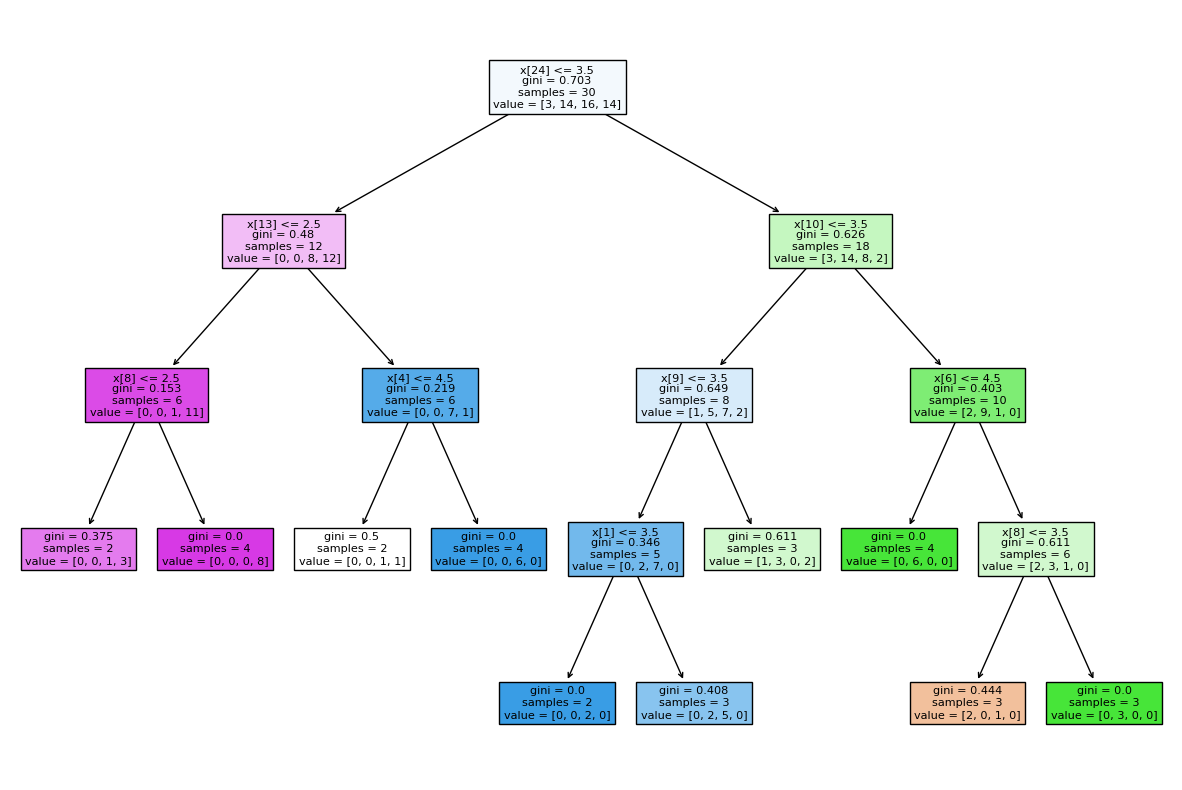

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(arveres.estimators_[0], filled=True)
plt.show()

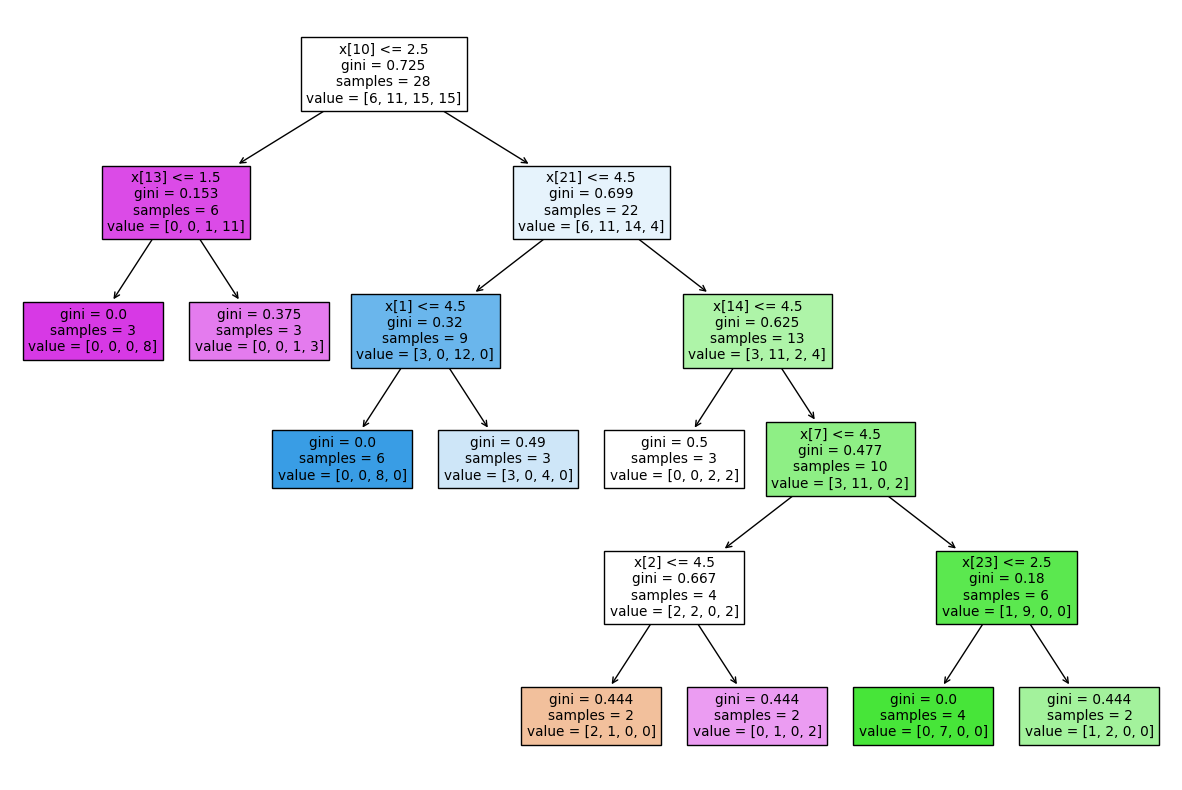

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(arveres.estimators_[10], filled=True)
plt.show()

In [ ]:
# Acesse as importâncias das características
feature_importances = arveres.feature_importances_

# Exiba as importâncias das características
for i, importance in enumerate(feature_importances):
    print(f'Feature {i}: {importance}')

Feature 0: 0.013535957890740401
Feature 1: 0.030390518739083286
Feature 2: 0.02731779880561635
Feature 3: 0.04110415778840553
Feature 4: 0.01105849366447857
Feature 5: 0.0034204515450898076
Feature 6: 0.02068823928096738
Feature 7: 0.019931363215297912
Feature 8: 0.06624871688684271
Feature 9: 0.03017105156419261
Feature 10: 0.06678412930413527
Feature 11: 0.021997865854849443
Feature 12: 0.0667443464682153
Feature 13: 0.04264511072814415
Feature 14: 0.18275571774889302
Feature 15: 0.019868326115546855
Feature 16: 0.06103277264039429
Feature 17: 0.01344784221200896
Feature 18: 0.0407243176064191
Feature 19: 0.02129868214332251
Feature 20: 0.01708118286169793
Feature 21: 0.04248592352133269
Feature 22: 0.05581653144769388
Feature 23: 0.043420160361998875
Feature 24: 0.04003034160463326


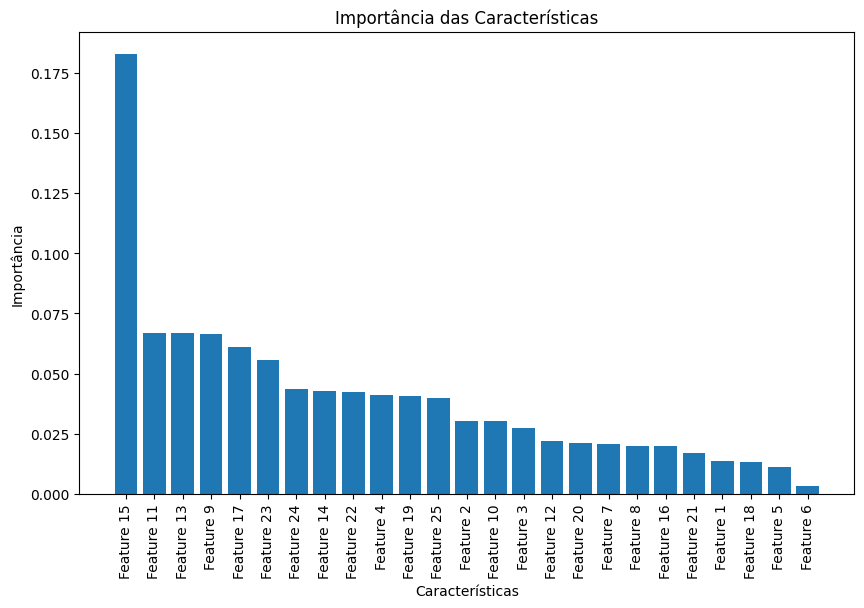

In [ ]:
# Obtenha a importância das características
feature_importance = arveres.feature_importances_

# Obtenha os nomes das características
feature_names = [f"Feature {i+1}" for i in range(len(feature_importance))]

# Ordene as características pelo valor de importância
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance, align="center")
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel("Características")
plt.ylabel("Importância")
plt.title("Importância das Características")
plt.show()